<a href="https://colab.research.google.com/github/sourisvs/HEV_Heuristic_Pow_control/blob/main/Drive_cycle_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.gridspec as grd
from mpl_toolkits.mplot3d import axes3d
from random import seed
from random import random
from math import *
from google.colab import files

In [48]:
uploaded = files.upload()

Saving city2.csv to city2.csv


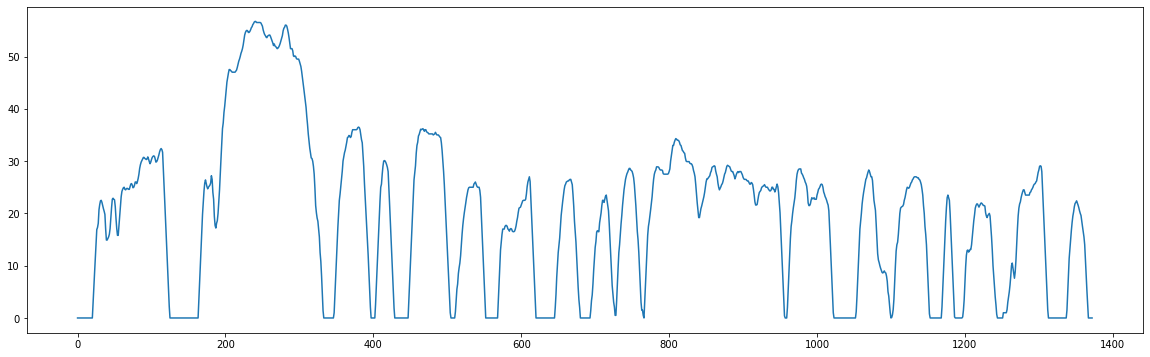

In [57]:
#open csv file of drivecycle
#modify file name according to the name of the file on the system
df1 = pd.read_csv(io.BytesIO(uploaded['city2.csv']))
x=pd.DataFrame(df1['Speed'])
v = x.to_numpy()
vmax = max(v)
v_SI = 0.44704*v
acc = np.zeros(len(v))
for i in range(len(v)-1):
  acc[i] = (v_SI[i+1]-v_SI[i])
veloc = np.zeros(4*len(v))
fig1 = plt.figure(figsize=(20,6))
plt.plot(v)

[56.7] 19


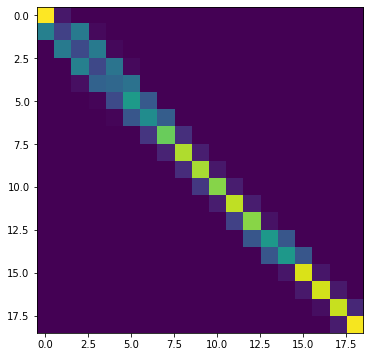

In [52]:
n = int(vmax/3) +1 
print(vmax,n)
stat = np.zeros((n,n))
prev = 0
curr = 0
for i in range(len(v)):
  curr = int(v[i]/3)
  stat[prev][curr] = stat[prev][curr] + 1
  prev = curr
tpm = stat/stat.sum(axis = 1)[:,None]
x = np.linspace(0,len(tpm)-1,len(tpm))
y = np.linspace(0,len(tpm)-1,len(tpm))
X, Y = np.meshgrid(x, y)
fig = plt.figure(figsize=(10,6))
plt.imshow(tpm)
#ax = fig.add_subplot(111, projection='3d')
#ax.plot_surface(X,Y,tpm,cmap=cm.viridis)

In [53]:
stateChangeHist = np.zeros((n,n))
state = np.zeros([1,n])
state[0][0] = 1.
currentState = 0
stateHist=state
dfStateHist=pd.DataFrame(state)
distr_hist = np.zeros([1,n], dtype = int)
seed(4)

In [54]:
def simulate_multinomial(vmultinomial):
  r=np.random.uniform(0.0,1.0)
  #print(r)
  CS=np.cumsum(vmultinomial)
  CS=np.insert(CS,0,0)
  #print(CS)
  m=(np.where(CS<r))[0]
  #print(m)
  nextState=m[len(m)-1]
  return nextState

In [55]:
for x in range(4*len(v)):
  veloc[x] = currentState*3
  currentRow=np.ma.masked_values((tpm[currentState]), 0.0)
  #limsum = sum((tpm[currentState]))
  #print(limsum)
  nextState=simulate_multinomial(currentRow)
  # Keep track of state changes
  stateChangeHist[currentState,nextState]+=1
   # Keep track of the state vector itself
  #print(stateChangeHist)
  state = np.zeros([1,n])
  state[0][nextState]=1.0
  # Keep track of state history
  stateHist=np.append(stateHist,state,axis=0)
  currentState=nextState
  totals=np.sum(stateHist,axis=0)
  gt=np.sum(totals)
  distrib=totals/gt
  distrib=np.reshape(distrib,(1,n))
  distr_hist=np.append(distr_hist,distrib,axis=0)

[[0.25650828 0.02931003 0.02657928 0.02512288 0.03477153 0.05443291
  0.05971236 0.11796832 0.14873475 0.08592754 0.04587657 0.07427635
  0.02803568 0.0065538  0.00236665 0.00382305 0.         0.
  0.        ]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


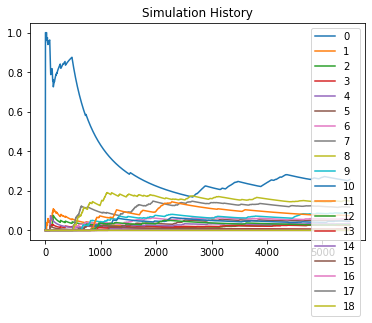

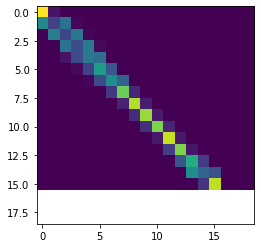

In [56]:
print(distrib)
P_hat=stateChangeHist/stateChangeHist.sum(axis=1)[:,None]
#t = sum(stateChangeHist)
#P_hat = stateChangeHist/sum(t)
# Check estimated state transition probabilities based on history so far:
dfDistrHist = pd.DataFrame(distr_hist)
# Plot the distribution as the simulation progresses over time
dfDistrHist.plot(title="Simulation History")
plt.show()
plt.imshow(P_hat)
plt.show()

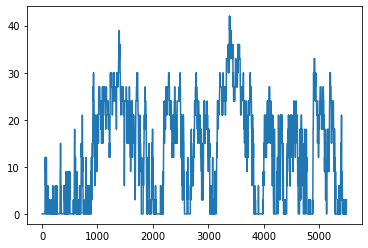

In [41]:
velocity  = np.zeros(len(v))
for i in range(len(v)):
  velocity[i] = veloc[i]
plt.plot(veloc)
#for i in range(len(veloc)):
#  print(veloc[i])

Text(0, 0.5, 'Speed')

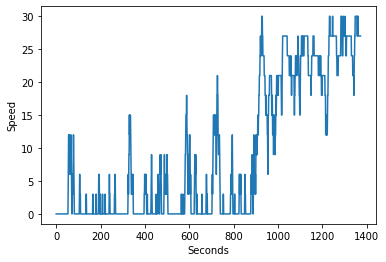

In [42]:
plt.plot(velocity)
plt.xlabel('Seconds')
plt.ylabel('Speed')

In [43]:
#Function to find the least square distance between the velocities of the standard and random drive cycles
def lsd(i):
    p=velocity[i]
    q=v[i]
    s=(p-q)**2
    return int(s)

In [44]:
#Function to find mean of the velocities of the standard and random drive cycles
def mean(i):
    a=velocity[i]
    b=v[i]
    return (a+b)/2

In [45]:
#Mean correction criteria
#If the least square distance for corresponding time is greater than 5 units, the random drive cycle value is replaced by the mean of the standard and random drive cycle
for i in range(0,len(velocity)):
    if lsd(i)>5:
        velocity[i]=mean(i)

Text(0, 0.5, 'Speed')

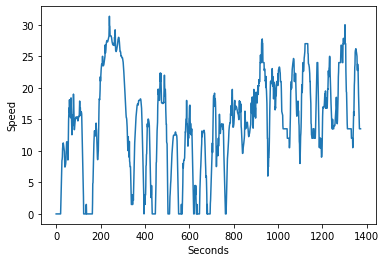

In [46]:
#Corrected drive cycle
plt.plot(velocity)
plt.xlabel('Seconds')
plt.ylabel('Speed')

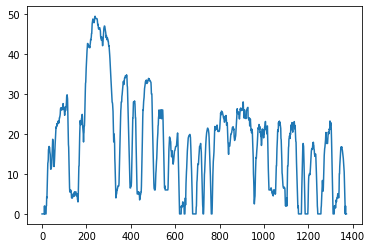

In [29]:
#To download csv file of corrected drive cycle 
A=pd.DataFrame(velocity)
plt.plot(A)
from IPython.display import HTML
import base64  
import pandas as pd  
#vary name for each iteration accrodingly , and correct the names when called for stitching
def create_download_link( df, title = "Download CSV file", filename = "drivecycle1.csv"):  
    csv = df.to_csv(index =False)
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)
create_download_link(A)

Stitching


In [ ]:
upload1 = files.upload()
upload2 = files.upload()
upload3 = files.upload()
upload4 = files.upload()
zero = files.upload()

In [ ]:
#After producing multiple corrected drive cycles, the data is downloaded and stitched.
#can be manually stitched in excel too.
#Corrected drive cycle 1
dfx=pd.read_csv(io.BytesIO(upload1["drivecycle1.csv"]))
plt.plot(dfx)

In [ ]:
#Corrected drive cycle 2
dfy=pd.read_csv(io.BytesIO(upload2["drivecycle2.csv"]))
plt.plot(dfy)
U=dfy.tail(385) #for smooth end

In [ ]:
#Corrected  drive cycle 3
dfb=pd.read_csv(io.BytesIO(upload3["drivecycle3.csv"]))
plt.plot(dfb)

In [ ]:
#Corrected drive cycle 4
dfbb=pd.read_csv(io.BytesIO(upload4["drivecycle4.csv"]))
plt.plot(dfbb)

In [ ]:
#Zero file
df0=pd.read_csv(io.BytesIO(zero["zeros.csv"]))
plt.plot(df0)

In [ ]:
#Concatenating the above cycles to obtain the Final drive cycle
df_row1 = pd.concat([dfx,df0,dfy,df0,dfb,df0,dfbb,df0,dfz,df0,U],ignore_index=True)

In [ ]:
#to download the final drive cycle as CSV
create_download_link(df_row)

In [ ]:
#FINAL DRIVE CYCLE
dfq=pd.read_csv("Stitchedrivecycle1.csv")
plt.plot(dfq)
plt.xlabel('Seconds')
plt.ylabel('Speed')